perplexity 1.1, 449210.7 tokens/sec on cuda:0
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


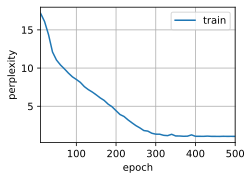

In [27]:

import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l


batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

class RNNModel(nn.Module):
    """循环神经网络模型。"""
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size 
        self.num_hiddens = self.rnn.hidden_size
        self.Linear = nn.Linear(self.num_hiddens, self.vocab_size)

    
    def forward(self, inputs, state):
        X = F.one_hot(inputs.T.long(), self.vocab_size)
        X =  X.to(torch.float32)
        Y, state = self.rnn(X, state)
        output = self.Linear(Y.reshape((-1, Y.shape[-1])))
        return output, state 

    def begin_state(self, device, batch_size=1):
        if not isinstance(self.rnn, nn.LSTM):
            return torch.zeros(( self.rnn.num_layers,
                                batch_size, self.num_hiddens), device=device)
        else:
            return (torch.zeros(( self.rnn.num_layers,
                                 batch_size, self.num_hiddens),
                                device=device),
                    torch.zeros(( self.rnn.num_layers,
                                 batch_size, self.num_hiddens),
                                device=device))

device = d2l.try_gpu()
num_hiddens = 256
# rnn_layer = nn.RNN(len(vocab), num_hiddens)
# rnn_layer = nn.GRU(len(vocab), num_hiddens)
rnn_layer = nn.LSTM(len(vocab), num_hiddens)
net = RNNModel(rnn_layer, vocab_size=len(vocab))
net = net.to(device)
num_epochs, lr = 500, 1
d2l.train_ch8(net, train_iter, vocab, lr, num_epochs, device)

In [2]:
import torch
from torch import nn 
rnn = nn.RNN(10,20,2)
input = torch.randn(5,3,10)
h0 = torch.randn(2,3,20)
output, hn = rnn(input, h0)



In [4]:
hn.shape 

torch.Size([2, 3, 20])

In [5]:
output.shape 

torch.Size([5, 3, 20])

In [12]:
a = [ i for i in rnn.parameters()]

In [13]:
a

[Parameter containing:
 tensor([[-6.1225e-02, -1.3812e-01, -1.9860e-02,  1.1780e-01, -1.5867e-01,
           1.4625e-01,  1.7198e-02,  1.9251e-01, -1.1362e-01, -1.8573e-01],
         [-2.1709e-01,  1.4975e-01, -3.6126e-02,  6.6534e-02, -5.7933e-02,
           5.2103e-03,  1.9838e-01, -3.4937e-02,  5.0141e-02,  2.1390e-01],
         [-2.7007e-02, -2.1392e-01,  1.0508e-01,  4.9905e-02, -9.6335e-02,
          -1.0373e-01, -1.6112e-01, -9.8407e-02,  1.1774e-01, -1.9449e-01],
         [-5.3561e-02,  2.6599e-02,  2.1515e-01,  4.0849e-02, -1.4808e-01,
          -3.3529e-02, -1.7768e-02, -8.9268e-02,  1.9474e-01,  8.9208e-03],
         [ 9.0749e-02, -9.4886e-02,  1.5901e-01,  1.0797e-01,  5.1632e-02,
           2.2856e-02,  1.0624e-02,  1.7806e-01, -1.5915e-01,  2.9673e-02],
         [ 1.7815e-01, -1.9865e-01,  1.1659e-01, -2.0720e-01,  1.2413e-02,
           1.3090e-01, -1.8534e-01,  1.7808e-01, -5.8387e-02, -1.0777e-04],
         [ 1.2907e-01,  9.8358e-02, -5.0780e-02,  3.4251e-02,  5.8007e-

In [18]:
for par in rnn.parameters():
    print(par)

Parameter containing:
tensor([[-6.1225e-02, -1.3812e-01, -1.9860e-02,  1.1780e-01, -1.5867e-01,
          1.4625e-01,  1.7198e-02,  1.9251e-01, -1.1362e-01, -1.8573e-01],
        [-2.1709e-01,  1.4975e-01, -3.6126e-02,  6.6534e-02, -5.7933e-02,
          5.2103e-03,  1.9838e-01, -3.4937e-02,  5.0141e-02,  2.1390e-01],
        [-2.7007e-02, -2.1392e-01,  1.0508e-01,  4.9905e-02, -9.6335e-02,
         -1.0373e-01, -1.6112e-01, -9.8407e-02,  1.1774e-01, -1.9449e-01],
        [-5.3561e-02,  2.6599e-02,  2.1515e-01,  4.0849e-02, -1.4808e-01,
         -3.3529e-02, -1.7768e-02, -8.9268e-02,  1.9474e-01,  8.9208e-03],
        [ 9.0749e-02, -9.4886e-02,  1.5901e-01,  1.0797e-01,  5.1632e-02,
          2.2856e-02,  1.0624e-02,  1.7806e-01, -1.5915e-01,  2.9673e-02],
        [ 1.7815e-01, -1.9865e-01,  1.1659e-01, -2.0720e-01,  1.2413e-02,
          1.3090e-01, -1.8534e-01,  1.7808e-01, -5.8387e-02, -1.0777e-04],
        [ 1.2907e-01,  9.8358e-02, -5.0780e-02,  3.4251e-02,  5.8007e-02,
          

In [19]:
print(rnn)

RNN(10, 20, num_layers=2)


In [10]:
a

[<generator object Module.parameters at 0x0000027243E5ECF0>]